In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

semilla = 2239

# Carga del conjunto de datos
df = pd.read_csv('Valhalla23.csv')

# Separacion de características y variable objetivo
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir el conjunto de datos en entrenamiento (40%), validación (40%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=semilla)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=semilla)

# Estandarizacion de las caracteristicas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [2]:
model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=semilla)
model.fit(X_train, y_train)


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=2239)

In [10]:

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_val = mean_squared_error(y_val, model.predict(X_val))
mse_test = mean_squared_error(y_test, model.predict(X_test))

print("MSE Entrenamiento:", mse_train)
print("MSE Validación:", mse_val)
print("MSE Prueba:", mse_test)


MSE Entrenamiento: 33.23415044573609
MSE Validación: 47.09996440720911
MSE Prueba: 68.65776439029783


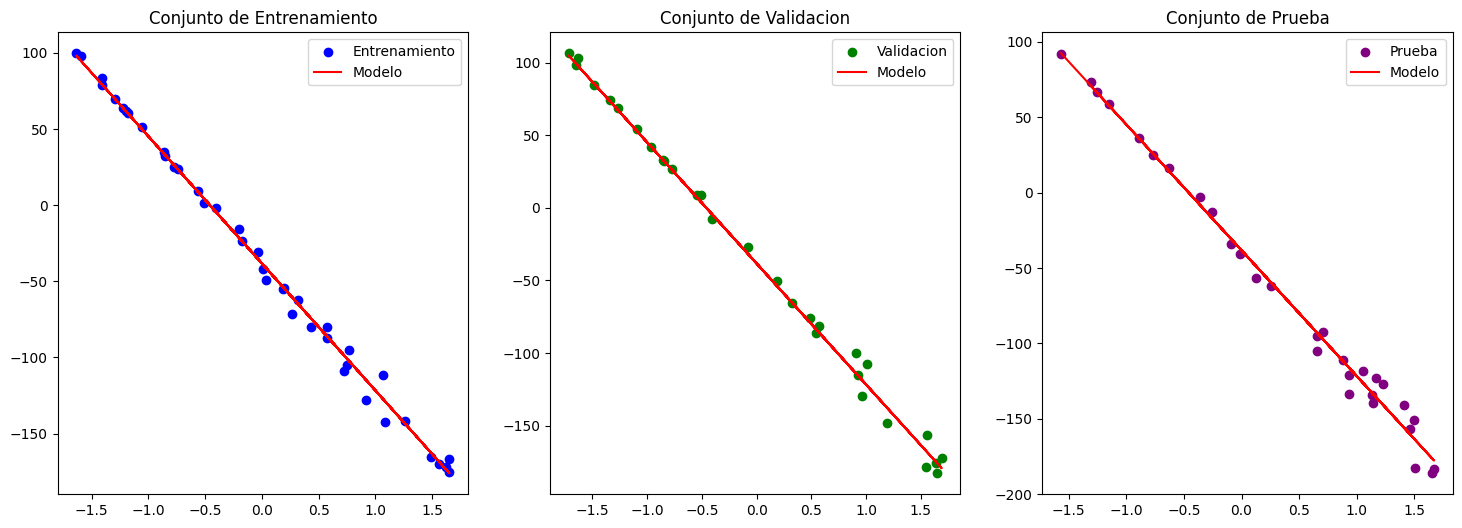

In [4]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Entrenamiento')
plt.plot(X_train[:, 0], y_train_pred, color='red', label='Modelo')
plt.title('Conjunto de Entrenamiento')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_val[:, 0], y_val, color='green', label='Validacion')
plt.plot(X_val[:, 0], y_val_pred, color='red', label='Modelo')
plt.title('Conjunto de Validacion')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], y_test, color='purple', label='Prueba')
plt.plot(X_test[:, 0], y_test_pred, color='red', label='Modelo')
plt.title('Conjunto de Prueba')
plt.legend()

plt.show()


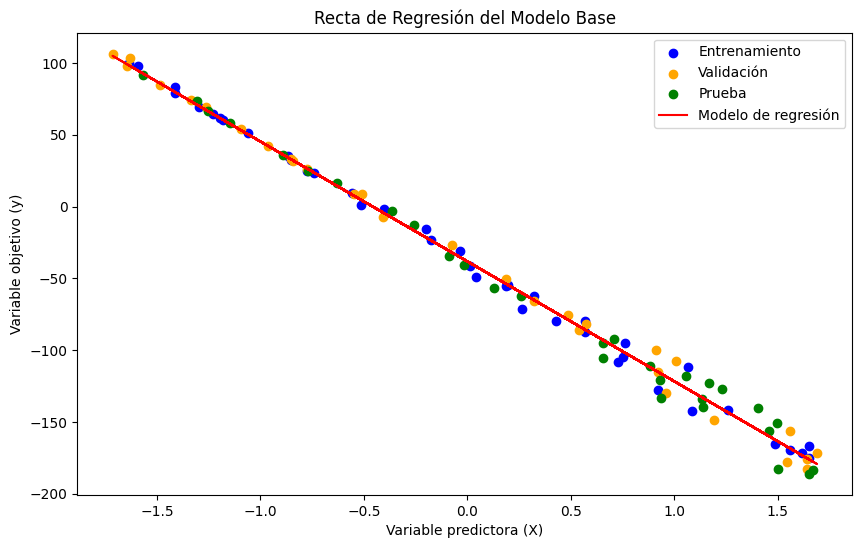

In [18]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 0], y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val[:, 0], y_val, color='orange', label='Validación')
plt.scatter(X_test[:, 0], y_test, color='green', label='Prueba')

# Predicciones del modelo base
X_full = np.vstack([X_train, X_val, X_test])
y_pred = model.predict(X_full)

plt.plot(X_full[:, 0], y_pred, color='red', label='Modelo de regresión')

plt.title("Recta de Regresión del Modelo Base")
plt.xlabel("Variable predictora (X)")
plt.ylabel("Variable objetivo (y)")
plt.legend()
plt.show()

In [5]:
sizes = np.random.choice(range(2, 40), size=20, replace=False)
if 2 not in sizes:
    sizes[0] = 2
sizes = sorted(sizes)


In [11]:
n = 100
train_errors = []
val_errors = []

for size in sizes:
    temp_train_errors = []
    temp_val_errors = []
    
    for _ in range(n):
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=np.random.randint(10000))
        model.fit(X_train_sample, y_train_sample)
        
        temp_train_errors.append(mean_squared_error(y_train_sample, model.predict(X_train_sample)))
        temp_val_errors.append(mean_squared_error(y_val, model.predict(X_val)))
    
    train_errors.append(np.mean(temp_train_errors))
    val_errors.append(np.mean(temp_val_errors))


In [7]:
train_errors = [np.mean(te) for te in train_errors]
val_errors = [np.mean(ve) for ve in val_errors]
train_errors.insert(0, mse_train)
val_errors.insert(0, mse_val)

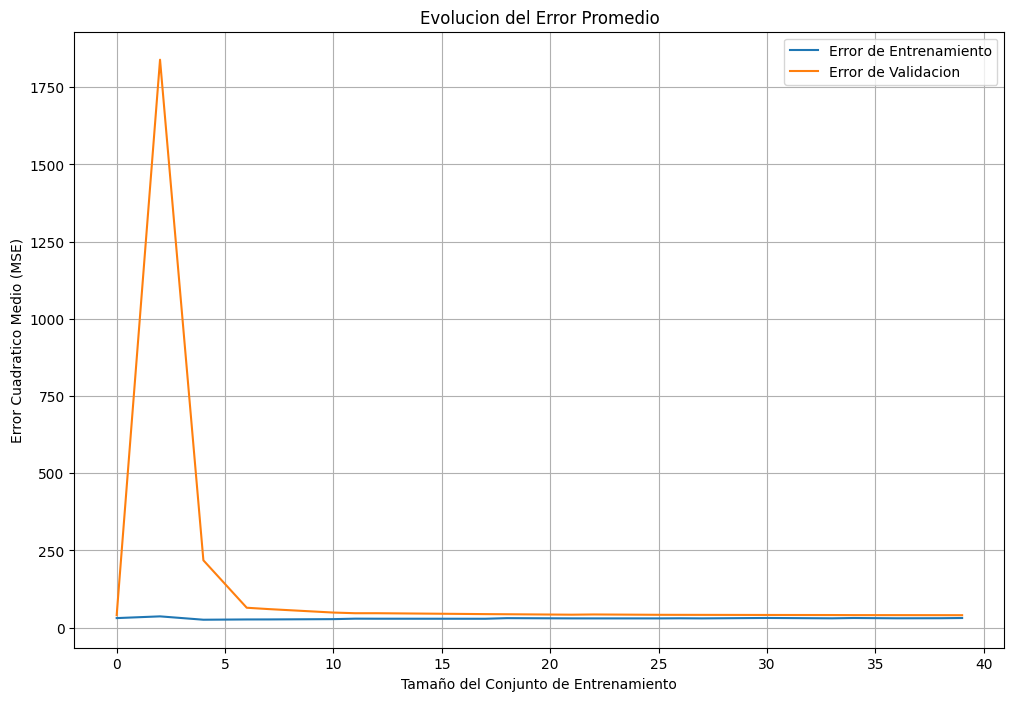

In [8]:
plt.figure(figsize=(12, 8))
plt.plot([0] + sizes, train_errors, label='Error de Entrenamiento')
plt.plot([0] + sizes, val_errors, label='Error de Validacion')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadratico Medio (MSE)')
plt.title('Evolucion del Error Promedio')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
optimal_sample_size = sizes[np.argmin(val_errors[:-1])] 

# Entrenar un nuevo modelo con la cantidad óptima de muestras
optimal_idx = np.random.choice(np.arange(len(X_train)), optimal_sample_size, replace=False)
X_optimal = X_train[optimal_idx]
y_optimal = y_train[optimal_idx]

optimal_model = SGDRegressor(max_iter=int(1e6), learning_rate='constant', eta0=1e-4, random_state=semilla)
optimal_model.fit(X_optimal, y_optimal)

mse_train_opt = mean_squared_error(y_train_opt, model.predict(X_train_opt))
mse_val_opt = mean_squared_error(y_val, model.predict(X_val))
mse_test_opt = mean_squared_error(y_test, model.predict(X_test))

print("MSE Entrenamiento Óptimo:", mse_train_opt)
print("MSE Validación Óptimo:", mse_val_opt)
print("MSE Prueba Óptimo:", mse_test_opt)


MSE Entrenamiento Óptimo: 42.3116748450077
MSE Validación Óptimo: 39.91570238459982
MSE Prueba Óptimo: 67.26916403069472


In [15]:
print(f"Errores del modelo base: Entrenamiento={mse_train}, Validación={mse_val}, Prueba={mse_test}")
print(f"Errores del modelo óptimo: Entrenamiento={mse_train_opt}, Validación={mse_val_opt}, Prueba={mse_test_opt}")

Errores del modelo base: Entrenamiento=33.23415044573609, Validación=47.09996440720911, Prueba=68.65776439029783
Errores del modelo óptimo: Entrenamiento=42.3116748450077, Validación=39.91570238459982, Prueba=67.26916403069472


# Análisis del tipo de ajuste

Modelo entrenado con 2 muestras:
Cuando entrenamos con solo 2 muestras, el modelo tiene un alto sesgo y no puede captar la relacion entre las variables predictoras y la variable objetivo y esto conduce a un "underfitting" severo.

Modelo entrenado con 40 muestras:
A medida que aumentamos el tamaño de las muestras, el modelo comienza a captar mejor la relación, lo que reduce el sesgo, tambien el error en el conjunto de entrenamiento disminuye y el modelo se ajusta mejor tanto al conjunto de validación como al de prueba.

# Análisis de sesgo y varianza

Como mencione anteriormente cuando el tamaño del conjunto de entrenamiento es pequeño, el modelo tiene un alto sesgo porque no tiene suficientes datos para aprender adecuadamente.

A medida que aumentamos el tamaño del conjunto de entrenamiento, el sesgo disminuye, lo que se refleja en una mejora del rendimiento del modelo en el conjunto de validacio, sin embargo, si seguimos aumentando las muestras hasta un punto crítico, la varianza comienza a aumentar.

# Justificación del tamaño de muestra seleccionado

Como mencione anteriormente seleccione el tamaño de muestra óptimo como aquel que minimiza el error en el conjunto de validación, este tamaño de muestra es un buen balance entre sesgo y varianza. Las afectaciones de esta dependiendo de si el tamaño es muy grande o pequeño ya fueron mencionadas.

# Comparación del modelo final contra la línea base

El modelo final entrenado con el tamaño de muestra óptimo debería mostrar un error de validación menor que el modelo base.
Si el error en el conjunto de prueba también es menor que el del modelo base, podemos concluir que este modelo generaliza mejor.



In [54]:
!jupyter nbconvert --to html 'Valhalla.ipynb'

31992.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[NbConvertApp] Converting notebook Valhalla.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 446257 bytes to Valhalla.html
